In [2]:
import numpy as np
import scipy.special
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy.misc import derivative
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Image

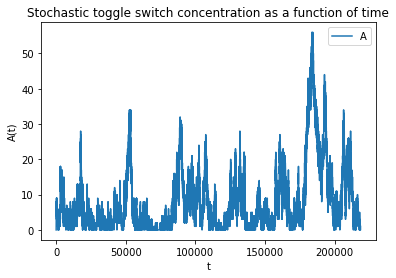

In [49]:
#Problem 2 Part 1


#Helper functions
def w_ran(k):
    """
    k an array of probabilities
    returns number associated with state chosen
    assumes sum(ki)=1
    
    """
    ran=np.random.random_sample()
    if ran < k[0]:
        return 0
    elif ran < np.sum(k[0:2]):
        return 1
    elif ran < np.sum(k[0:3]):
        return 2
    elif ran < np.sum(k[0:4]):
        return 3
    elif ran < np.sum(k[0:5]):
        return 4
    elif ran < np.sum(k[0:6]):
        return 5
    elif ran < np.sum(k[0:7]):
        return 6
    elif ran < np.sum(k[0:8]):
        return 7
    elif ran < np.sum(k[0:9]):
        return 8
    elif ran < np.sum(k[0:10]):
        return 9
    elif ran < np.sum(k[0:11]):
        return 10
    else:
        return 11

    
#Constants and matrices
R=np.array([[-2, 1, 0, 0, 0, 0, 0, 0], 
            [2, -1, 0, 0, 0, 0, 0, 0], 
            [0, 0, -2, 1, 0, 0, 0, 0], 
            [0, 0, 2, -1, 0, 0, 0, 0],
            [0, -1, 0, 0, 0, -1, 1,0],
            [0, 1, 0, 0, 0, 1, -1, 0], 
            [0, 0, 0, -1, -1, 0, 0, 1], 
            [0, 0, 0, 1, 1, 0, 0, -1],
            [1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0, 0, 0],
            [-1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, -1, 0, 0, 0, 0, 0]])

q0=np.array([0, 0, 0, 0, 1, 1, 0, 0])
a=1
d=1
a1=1
d1=1
k1=1
k1r=1
k2=1
k2r=1
b=5 #beta
g=1 #gamma
V=1 #Volume
steps=200000

def toggle_SSA(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V):
    tlog=np.array([0])
    q=q0
    qlogA=np.array([q[0]])#for now just looking at A
    qlogB=np.array([q[2]])
    for i in range(steps):
        a_q=np.array([a/V*q[0]**2,
                      d*q[1],
                      a1/V*q[2]**2,
                      d1*q[3],
                      k1/V*q[1]*q[5],
                      k1r*(q0[5]-q[5]),
                      k2/V*q[3]*q[4],
                      k2r*(q0[4]-q[4]),
                      b*q[4],
                      b*q[5],
                      g*q[0],
                      g*q[2]])
        k=a_q/np.sum(a_q)
        kfire=w_ran(k)
        #print (kfire)
        dtn=np.array([])
        for i in range(12):
            if a_q[i] != 0:
                dti=np.exp(1/a_q[i])
                dtn=np.append(dtn, np.array([dti]))
        dt=np.amin(dtn)
        tlog=np.append(tlog, np.array([tlog[-1]+dt]))
        q=np.add(q, R[kfire]) #Adds the reaction corresponding to which one randomly fires
        q[q < 0] = 0
        qlogA=np.append(qlogA, q[0]+q[1]) #This is just the complex counts
        qlogB=np.append(qlogB, q[2]+q[3])
        
    return tlog, qlogA, qlogB
q1=toggle_SSA(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V)

plt.figure(0)
plt.plot(q1[0], q1[1], label='A')
#plt.plot(toggle_SSA(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V)[0], toggle_SSA(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V)[2], label='B')
plt.title('Stochastic toggle switch concentration as a function of time')
plt.xlabel('t')
plt.ylabel('A(t)')
plt.legend()
#plt.ylim(0, 50)
plt.show()

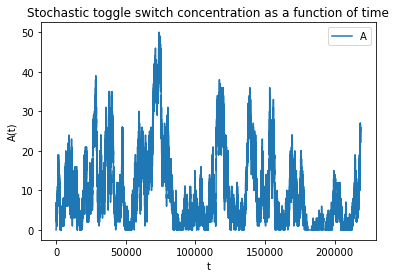

No handles with labels found to put in legend.


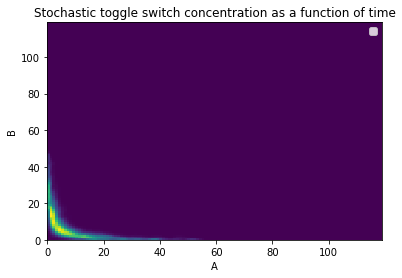

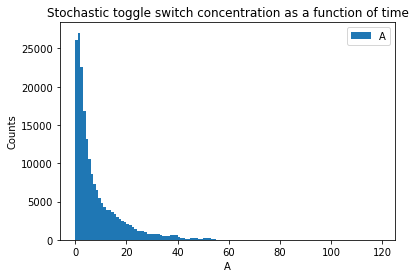

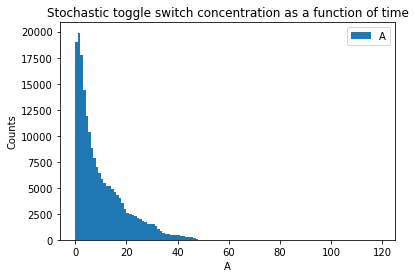

5


In [65]:
plt.figure(0)
plt.plot(q1[0], q1[2], label='A')
#plt.plot(toggle_SSA(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V)[0], toggle_SSA(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V)[2], label='B')
plt.title('Stochastic toggle switch concentration as a function of time')
plt.xlabel('t')
plt.ylabel('A(t)')
plt.legend()
#plt.ylim(0, 50)
plt.show()

#Problem 2 part 2
plt.figure(1)
plt.hist2d(q1[1],q1[2], bins=np.arange(0, 240/2), label='A')
plt.title('Stochastic toggle switch concentration as a function of time')
plt.xlabel('A')
plt.ylabel('B')
plt.legend()
#plt.ylim(0, 100)
plt.show()

#Problem 2 part 2
plt.figure(2)
plt.hist(q1[1], bins=np.arange(0, 120), label='A')
plt.title('Stochastic toggle switch concentration as a function of time')
plt.xlabel('A')
plt.ylabel('Counts')
plt.legend()
#plt.ylim(0, 100)
plt.show()


#Problem 2 part 2
plt.figure(3)
plt.hist(q1[2], bins=np.arange(0, 120), label='A')
plt.title('Stochastic toggle switch concentration as a function of time')
plt.xlabel('A')
plt.ylabel('Counts')
plt.legend()
#plt.ylim(0, 100)
plt.show()

print(b)

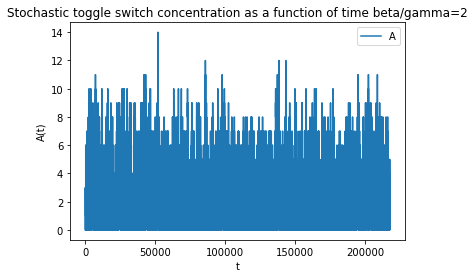

No handles with labels found to put in legend.


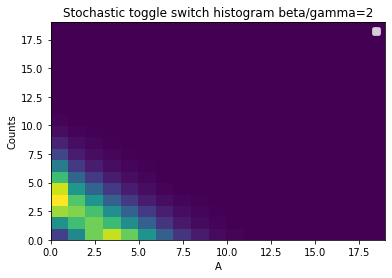

In [46]:
#Problem 2 part 3
bg2=toggle_SSA(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g*10, V)

#Let's try beta/gamma=2
plt.figure(0)
plt.plot(bg2[0], bg2[1], label='A')
#plt.plot(bg2[0], bg2[2], label='B')
plt.title('Stochastic toggle switch concentration as a function of time beta/gamma=2')
plt.xlabel('t')
plt.ylabel('A(t)')
plt.legend()
#plt.ylim(0, 50)
plt.show()

#Histogram
plt.figure(1)
plt.hist2d(bg2[1], bg2[2], bins=np.arange(0, 20), label='A')
plt.title('Stochastic toggle switch histogram beta/gamma=2')
plt.xlabel('A')
plt.ylabel('Counts')
plt.legend()
#plt.ylim(0, 100)
plt.show()

In [177]:
#Modified_functions

def toggle_SSA_T(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V, dT):
    k1r=k1r+dT*0.1
    k2r=k2r+dT*0.1
    tlog=np.array([0])
    q=q0
    qlogA=np.array([q[0]])#for now just looking at A
    qlogB=np.array([q[2]])
    for i in range(steps):
        a_q=np.array([a/V*q[0]**2,
                      d*q[1],
                      a1/V*q[2]**2,
                      d1*q[3],
                      k1/V*q[1]*q[5],
                      k1r*(q0[5]-q[5]),
                      k2/V*q[3]*q[4],
                      k2r*(q0[4]-q[4]),
                      b*q[4],
                      b*q[5],
                      g*q[0],
                      g*q[2]])
        k=a_q/np.sum(a_q)
        kfire=w_ran(k)
        #print (kfire)
        dtn=np.array([])
        for i in range(12):
            if a_q[i] != 0:
                dti=np.exp(1/a_q[i])
                dtn=np.append(dtn, np.array([dti]))
        dt=np.amin(dtn)
        tlog=np.append(tlog, np.array([tlog[-1]+dt]))
        q=np.add(q, R[kfire]) #Adds the reaction corresponding to which one randomly fires
        q[q < 0] = 0
        qlogA=np.append(qlogA, q[0]+q[1]) #This is just the complex counts
        qlogB=np.append(qlogB, q[2]+q[3])
    return tlog, qlogA, qlogB
        
def toggle_SSA_T_mod(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V, dT, kp):
    k1r=k1r+dT*0.1
    k2r=k2r+dT*0.1
    b=b*2
    tlog=np.array([0])
    q=q0
    qlogA=np.array([q[0]])#for now just looking at A
    qlogB=np.array([q[2]])
    for i in range(steps):
        a_q=np.array([a/V*q[0]**2,
                      d*q[1],
                      a1/V*q[2]**2,
                      d1*q[3],
                      k1/V*q[1]*q[5],
                      k1r*(q0[5]-q[5]),
                      k2/V*q[3]*q[4],
                      k2r*(q0[4]-q[4]),
                      b*q[4],
                      b*q[5],
                      (g+kp*(-.075)*dT)*q[0],
                      (g+kp*(-.075)*dT)*q[2]])
        k=a_q/np.sum(a_q)
        kfire=w_ran(k)
        #print (kfire)
        dtn=np.array([])
        for i in range(12):
            if a_q[i] != 0:
                dti=np.exp(1/a_q[i])
                dtn=np.append(dtn, np.array([dti]))
        dt=np.amin(dtn)
        tlog=np.append(tlog, np.array([tlog[-1]+dt]))
        q=np.add(q, R[kfire]) #Adds the reaction corresponding to which one randomly fires
        q[q < 0] = 0
        qlogA=np.append(qlogA, q[0]+q[1]) #This is just the complex counts
        qlogB=np.append(qlogB, q[2]+q[3])
    return tlog, qlogA, qlogB
        
kp=1
steps=2000000
        
#qT0=toggle_SSA_T(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V, 0)
#qT0_mod=toggle_SSA_T_mod(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V, 0, kp)

#qT5=toggle_SSA_T(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V, 5)
qT5_mod=toggle_SSA_T_mod(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V, 5, kp)
print('halfway')

#qT10=toggle_SSA_T(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V, 10)

#qT10_mod=toggle_SSA_T_mod(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V, 10, kp)
        

halfway


No handles with labels found to put in legend.


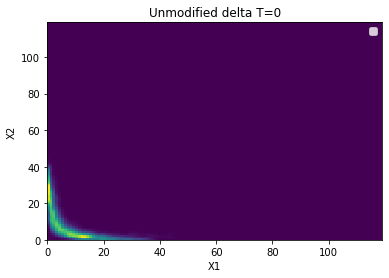

No handles with labels found to put in legend.


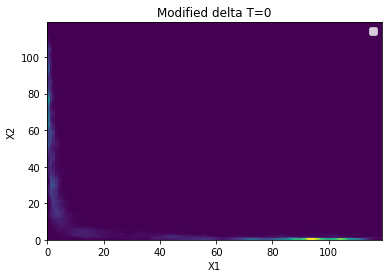

No handles with labels found to put in legend.


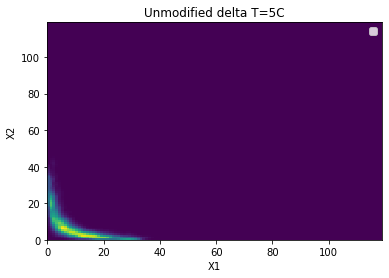

No handles with labels found to put in legend.


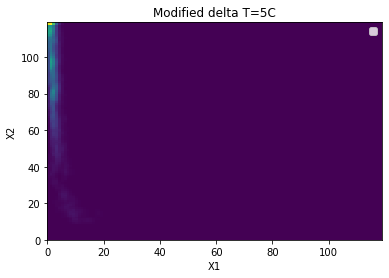

No handles with labels found to put in legend.


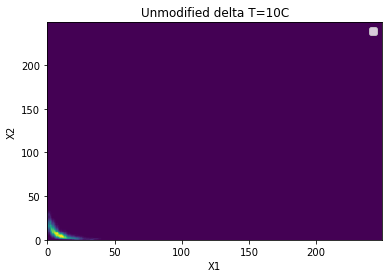

No handles with labels found to put in legend.


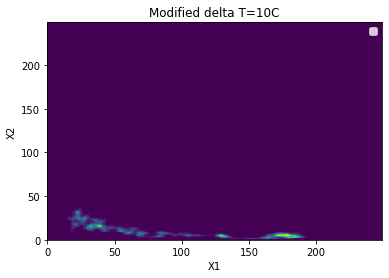

In [179]:
#Unmodified initial T
plt.figure(1)
plt.hist2d(qT0[1],qT0[2], bins=np.arange(0, 120), label='A')
plt.title('Unmodified delta T=0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
#plt.ylim(0, 100)
plt.show()

#Modified initial T
plt.figure(1)
plt.hist2d(qT0_mod[1],qT0_mod[2], bins=np.arange(0, 120), label='A')
plt.title('Modified delta T=0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
#plt.ylim(0, 100)
plt.show()

#Unmodified +5C
plt.figure(1)
plt.hist2d(qT5[1],qT5[2], bins=np.arange(0, 120), label='A')
plt.title('Unmodified delta T=5C')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
#plt.ylim(0, 100)
plt.show()

#Modified +5C
plt.figure(1)
plt.hist2d(qT5_mod[1],qT5_mod[2], bins=np.arange(0, 120), label='A')
plt.title('Modified delta T=5C')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
#plt.ylim(0, 100)
plt.show()


#Unmodified +10C
plt.figure(1)
plt.hist2d(qT10[1],qT10[2], bins=np.arange(0, 250), label='A')
plt.title('Unmodified delta T=10C')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
#plt.ylim(0, 100)
plt.show()

#Modified +10C
plt.figure(1)
plt.hist2d(qT10_mod_1[1],qT10_mod_1[2], bins=np.arange(0, 250), label='A') #, cmap='bwr')
plt.title('Modified delta T=10C')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
#plt.ylim(0, 100)
plt.show()




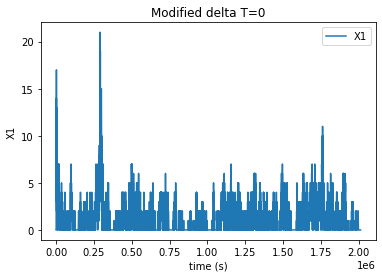

In [183]:
#Generating the time traces

#qT5=toggle_SSA_T(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V, 5)
#qT10_mod_1=toggle_SSA_T_mod(q0, a, d, a1, d1, k1, k1r, k2, k2r, b, g, V, 10, kp)


#Unmodified initial T
plt.figure(1)
plt.plot(qT5_mod[0],qT5_mod[1], label='X1')
plt.title('Modified delta T=0')
plt.xlabel('time (s)')
plt.ylabel('X1')
plt.legend()
#plt.ylim(0, 100)
plt.show()

5
1


<ipython-input-90-10645cb99175>:11: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(points, K*np.sqrt((b/g/points-1)), label='X1')


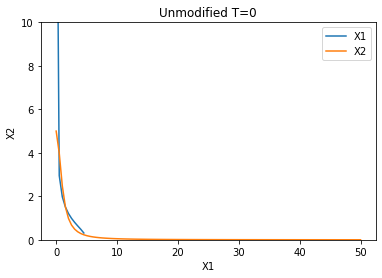

<ipython-input-90-10645cb99175>:24: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(points, K5*np.sqrt((b/g/points-1)), label='X1')


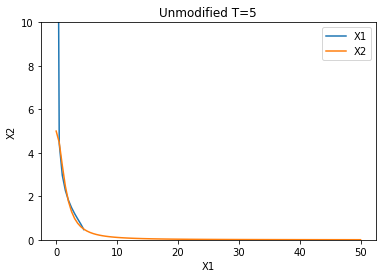

<ipython-input-90-10645cb99175>:38: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(points, K10*np.sqrt((b/g/points-1)), label='X1')


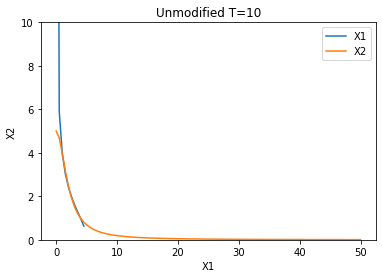

<ipython-input-90-10645cb99175>:51: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(points, K*np.sqrt((bm/gm/points-1)), label='X1')


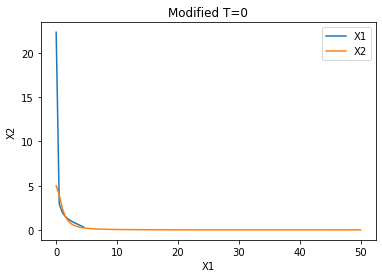

<ipython-input-90-10645cb99175>:63: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(points, K5*np.sqrt((bm/gm/points-1)), label='X1')


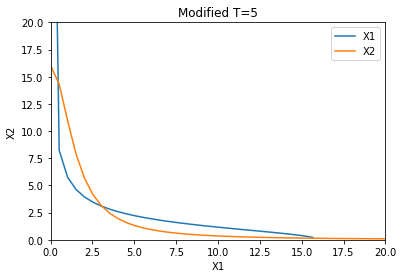

<ipython-input-90-10645cb99175>:76: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(points, K10*np.sqrt((bm/gm/points-1)), label='X1')


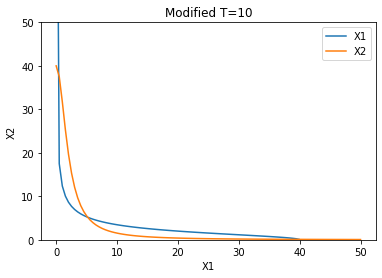

In [90]:
#Nullclines
K=k1r/k1 #(also equal to k2r/k2)
print(b)
print(g)

points=np.linspace(0.01, 50, 100)
points1=np.linspace(0, 50, 100)

#Unmodified T=0
plt.figure(0)
plt.plot(points, K*np.sqrt((b/g/points-1)), label='X1')
plt.plot(points, b/g/(1+(points1/K)**2), label='X2')
plt.title('Unmodified T=0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.ylim(0, 10)
plt.show()
          
T=5          
K5=K+T*0.1          
#Unmodified T=5
plt.figure(0)
plt.plot(points, K5*np.sqrt((b/g/points-1)), label='X1')
plt.plot(points, b/g/(1+(points/K5)**2), label='X2')
plt.title('Unmodified T=5')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.ylim(0, 10)
plt.show()
      
          
T=10          
K10=K+T*0.1   
#Unmodified T=5
plt.figure(0)
plt.plot(points, K10*np.sqrt((b/g/points-1)), label='X1')
plt.plot(points, b/g/(1+(points/K10)**2), label='X2')
plt.title('Unmodified T=10')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.ylim(0, 10)
plt.show()
          
bm=b*2
gm=g+kp          
#Modified T=0
plt.figure(0)
plt.plot(points, K*np.sqrt((bm/gm/points-1)), label='X1')
plt.plot(points, bm/gm/(1+(points/K)**2), label='X2')
plt.title('Modified T=0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
#plt.ylim(0, 50)
plt.show()
          
gm=g+kp*5*(-.075)       
#Modified T=5
plt.figure(0)
plt.plot(points, K5*np.sqrt((bm/gm/points-1)), label='X1')
plt.plot(points, bm/gm/(1+(points/K5)**2), label='X2')
plt.title('Modified T=5')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.ylim(0, 20)
plt.xlim(0, 20)
plt.show()
      
gm=g+kp*10*(-.075)              
#Modified T=10
plt.figure(0)
plt.plot(points, K10*np.sqrt((bm/gm/points-1)), label='X1')
plt.plot(points, bm/gm/(1+(points/K10)**2), label='X2')
plt.title('Modified T=10')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.ylim(0, 50)
plt.show()